<a href="https://colab.research.google.com/github/Sonali0572/Digit_Recognition/blob/main/Digit_Recognition_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Digit Recognition using LSTM 

In [ ]:
from tensorflow import keras
from keras.layers.recurrent import LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
label = ['0','1','2','3','4','5','6','7','8','9']

3


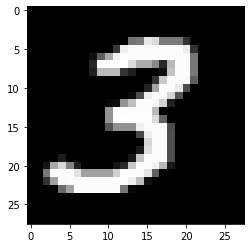

In [ ]:
i=135
plt.imshow(x_train[i],cmap='gray')
print(label[y_train[i]])

In [ ]:
model = keras.Sequential()
model.add(LSTM(50,input_shape=(28,28)))
model.add(keras.layers.Dense(10,activation='softmax'))              

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='Adam',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 21s 11ms/step - loss: 1.1378 - accuracy: 0.6127
Epoch 2/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4701 - accuracy: 0.8389
Epoch 3/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3793 - accuracy: 0.8730
Epoch 4/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3427 - accuracy: 0.8851
Epoch 5/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3149 - accuracy: 0.8948
Epoch 6/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2962 - accuracy: 0.9017
Epoch 7/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2719 - accuracy: 0.9070
Epoch 8/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2650 - accuracy: 0.9120
Epoch 9/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2618 - accuracy: 0.9121
Epoch 10/15
1875/1875 [==============================] - 20s 11m

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 939,    0,   14,    2,    3,    2,   13,    0,   29,    3],
       [   0, 1099,    4,    0,    4,    1,    2,   11,    2,    1],
       [   0,    9,  942,   10,   11,    5,    6,    7,    3,    4],
       [   3,    2,   21,  952,    0,   96,    1,    2,    8,   17],
       [   1,    5,    6,    0,  881,    1,    3,   24,    1,   78],
       [   3,    3,    9,   30,    1,  756,    7,    5,    6,   10],
       [   4,    4,   12,    0,    1,    9,  917,    0,    9,    0],
       [   0,    8,    5,    2,   14,    4,    0,  914,    4,   57],
       [  29,    5,   17,    8,   15,   13,    9,    1,  909,   10],
       [   1,    0,    2,    6,   52,    5,    0,   64,    3,  829]])

In [ ]:
accuracy_score(y_pred,y_test)

0.9138

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 5)
history = model.fit(x_train,y_train, epochs=25, validation_data=(x_test, y_test), callbacks = [early_stop])

Epoch 1/25
1875/1875 [==============================] - 24s 12ms/step - loss: 0.3732 - accuracy: 0.8871 - val_loss: 0.1537 - val_accuracy: 0.9547
Epoch 2/25
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1329 - accuracy: 0.9605 - val_loss: 0.1214 - val_accuracy: 0.9647
Epoch 3/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0988 - accuracy: 0.9704 - val_loss: 0.0879 - val_accuracy: 0.9735
Epoch 4/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0789 - accuracy: 0.9765 - val_loss: 0.0772 - val_accuracy: 0.9789
Epoch 5/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0698 - accuracy: 0.9790 - val_loss: 0.0701 - val_accuracy: 0.9798
Epoch 6/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0590 - accuracy: 0.9816 - val_loss: 0.0633 - val_accuracy: 0.9822
Epoch 7/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0545 - accuracy: 0.9829 - val_loss: 0.0668 -

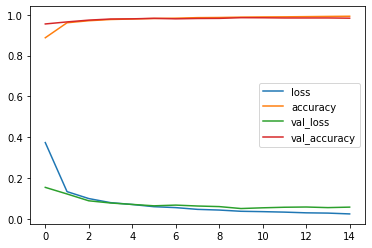

In [ ]:
loss = pd.DataFrame(history.history)
loss.plot()

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
accuracy_score(y_pred, y_test) * 100

98.3

In [ ]:
confusion_matrix(y_pred, y_test)

array([[ 970,    0,    0,    0,    0,    3,    2,    0,    3,    0],
       [   0, 1132,    1,    0,    0,    0,    3,    4,    0,    6],
       [   1,    0, 1013,    4,    0,    1,    0,    2,    3,    1],
       [   0,    0,    2,  990,    0,    5,    0,    0,    1,    0],
       [   2,    0,    0,    0,  961,    0,    0,    0,    2,   10],
       [   0,    0,    0,   10,    0,  880,    8,    0,    8,    2],
       [   4,    2,    1,    0,    1,    0,  943,    0,    0,    0],
       [   1,    1,    6,    2,    4,    2,    0, 1020,    3,    9],
       [   2,    0,    8,    3,    3,    1,    1,    1,  953,   13],
       [   0,    0,    1,    1,   13,    0,    1,    1,    1,  968]])

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       978
           1       1.00      0.99      0.99      1146
           2       0.98      0.99      0.98      1025
           3       0.98      0.99      0.99       998
           4       0.98      0.99      0.98       975
           5       0.99      0.97      0.98       908
           6       0.98      0.99      0.99       951
           7       0.99      0.97      0.98      1048
           8       0.98      0.97      0.97       985
           9       0.96      0.98      0.97       986

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
for i in range(10):
  print(int(y_test[i+134]), y_pred[i+134])

8 8
1 1
0 0
1 1
6 6
4 4
6 6
7 7
3 3
1 1
